        Date                            Game  Earnings  Players  Tournaments  \
0 1998-01-01  Command and Conquer: Red Alert   15000.0        8            1   
1 1998-01-01                      QuakeWorld   15000.0        8            1   
2 1998-05-01                        Quake II   15000.0        4            1   
3 1998-05-01              Total Annihilation   15000.0        2            1   
4 1998-05-01                      QuakeWorld     300.0        3            1   

  ReleaseDate                 Genre  TotalEarnings  OfflineEarnings  \
0  1996-01-01              Strategy       15000.00         15000.00   
1  1996-01-01  First-Person Shooter      105351.67         99505.44   
2  1997-01-01  First-Person Shooter      130725.98        130100.00   
3  1997-01-01              Strategy       15000.00         15000.00   
4  1996-01-01  First-Person Shooter      105351.67         99505.44   

   PercentOffline  TotalPlayers  TotalTournaments  Earnings_YoY_Growth  \
0        1.000000 

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


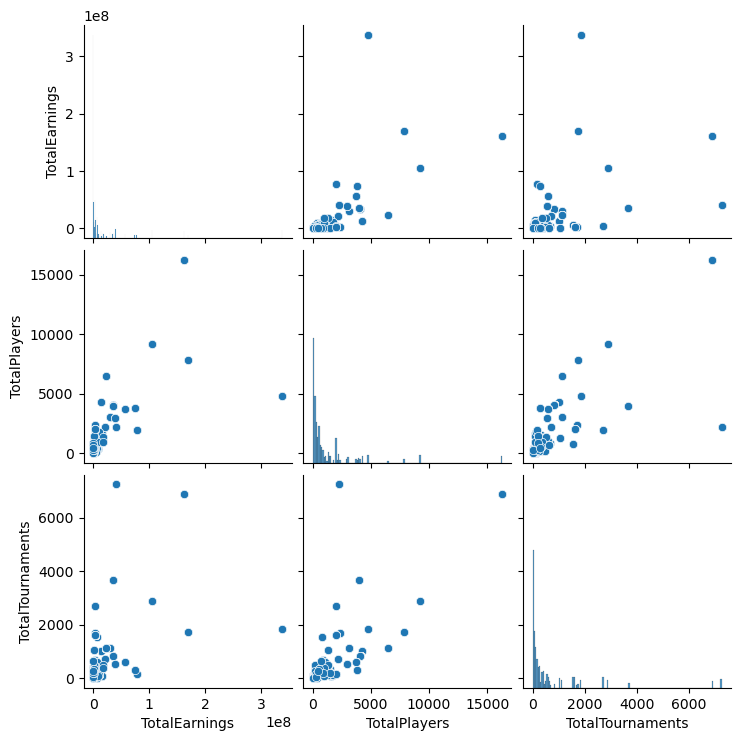

        Date                            Game  Earnings  Players  Tournaments  \
0 1998-01-01  Command and Conquer: Red Alert   15000.0        8            1   
1 1998-01-01                      QuakeWorld   15000.0        8            1   
2 1998-05-01                        Quake II   15000.0        4            1   
3 1998-05-01              Total Annihilation   15000.0        2            1   
4 1998-05-01                      QuakeWorld     300.0        3            1   

  ReleaseDate                 Genre  TotalEarnings  TotalPlayers  \
0  1996-01-01              Strategy       15000.00             8   
1  1996-01-01  First-Person Shooter      105351.67            59   
2  1997-01-01  First-Person Shooter      130725.98            37   
3  1997-01-01              Strategy       15000.00             2   
4  1996-01-01  First-Person Shooter      105351.67            59   

   TotalTournaments  Earnings_YoY_Growth  Players_YoY_Growth  \
0                 1                  NaN      

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned data
cleaned_data = pd.read_csv("cleaned_data_phantom_no_duplicates.csv", parse_dates=["Date"])

# Calculate year-over-year growth in earnings, player base, and tournaments
cleaned_data["Earnings_YoY_Growth"] = cleaned_data.groupby("Game")["Earnings"].pct_change() * 100
cleaned_data["Players_YoY_Growth"] = cleaned_data.groupby("Game")["Players"].pct_change() * 100
cleaned_data["Tournaments_YoY_Growth"] = cleaned_data.groupby("Game")["Tournaments"].pct_change() * 100

# Create categorical features for release decade 
cleaned_data["Release_Decade"] = (cleaned_data["Date"].dt.year // 10) * 10

# Display the updated cleaned data
print(cleaned_data.head())

# Drop unnecessary columns if needed
cleaned_data = cleaned_data.drop(["OfflineEarnings", "PercentOffline"], axis=1)

# Fill missing values with appropriate strategies
cleaned_data["TotalEarnings"].fillna(cleaned_data["TotalEarnings"].mean(), inplace=True)
cleaned_data["TotalPlayers"].fillna(cleaned_data["TotalPlayers"].median(), inplace=True)

# Check for missing values again
print(cleaned_data.isna().sum())

# Explore relationships between variables
sns.pairplot(cleaned_data[['TotalEarnings', 'TotalPlayers', 'TotalTournaments']])
plt.show()

# Merge the data with general data if available
# Assuming general_data is the same as cleaned_data for this example
merged_data = cleaned_data.copy()

# Display the merged data
print(merged_data.head())


# Save the merged data to a new CSV file
merged_data.to_csv("creation_data_phantom.csv", index=False)
